<a href="https://colab.research.google.com/github/s-r-aman/machine_learning_playground/blob/master/fastdotai_dl/lesson1-pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Env

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install fastai

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

# Importing Data

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_69.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_3.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_47.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_38.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
bs = 64

In [0]:
data = ImageDataBunch.from_name_re(
        path_img, 
        fnames, 
        pat, 
        ds_tfms=get_transforms(),
        size=224,
        bs=bs).normalize(imagenet_stats)

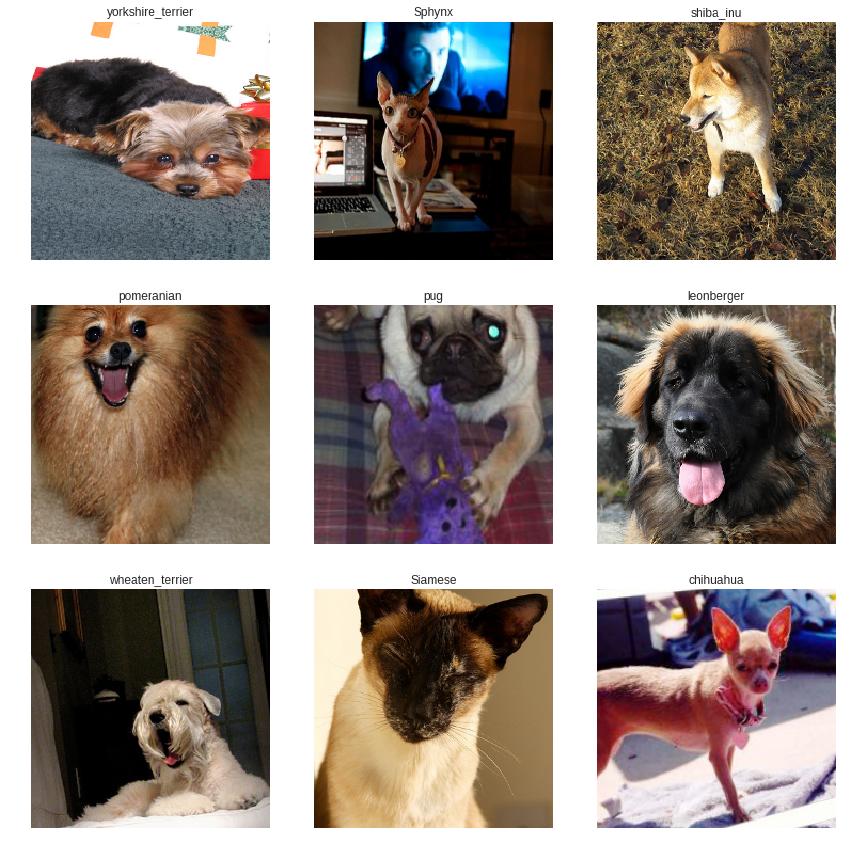

In [10]:
data.show_batch(rows=3, fisize=(7, 6))

In [11]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 90290920.05it/s]


In [0]:
learn.model

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,1.421632,0.340339,0.102165,02:00
2,0.544416,0.288442,0.092016,01:59
3,0.339853,0.243774,0.080514,02:01
4,0.260894,0.228553,0.075101,02:00


In [0]:
learn.save('stage-1')

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

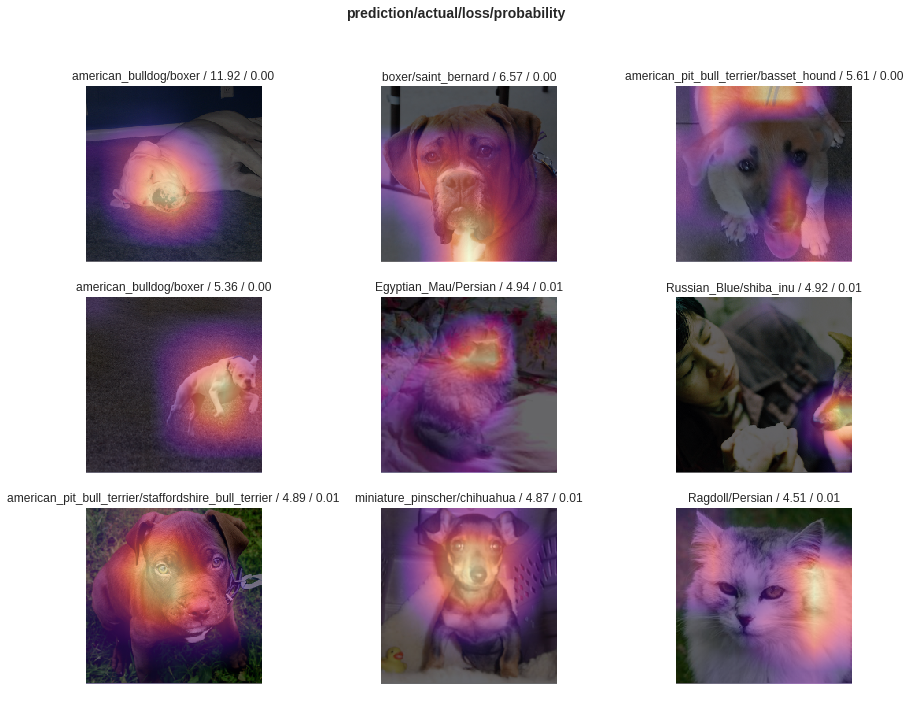

In [18]:
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
interp.plot_top_losses??

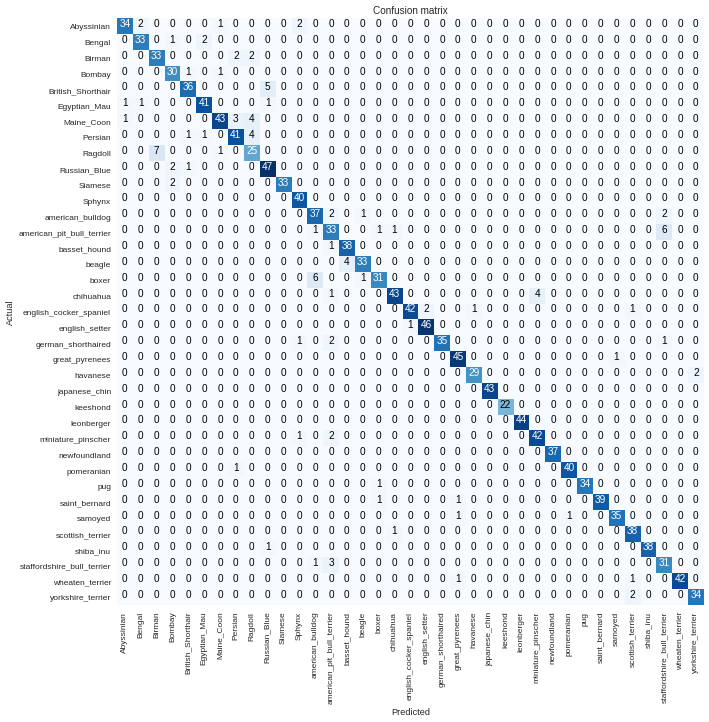

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('boxer', 'american_bulldog', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Maine_Coon', 'Ragdoll', 4),
 ('Persian', 'Ragdoll', 4),
 ('beagle', 'basset_hound', 4),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Maine_Coon', 'Persian', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Persian', 2),
 ('Birman', 'Ragdoll', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Bombay', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

In [0]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
1,0.548507,0.335082,0.104871,02:04


In [0]:
learn.load('stage-1')

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


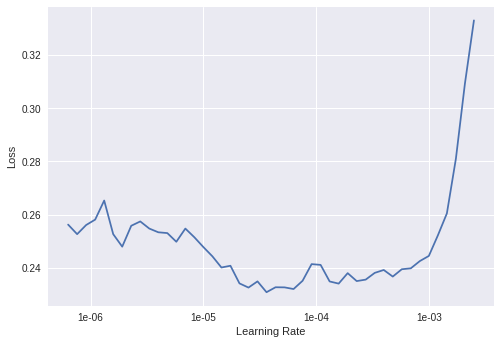

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.233940,0.217286,0.072395,02:03
2,0.204524,0.216078,0.073748,02:06


In [0]:
data = ImageDataBunch.from_name_re(
    path_img, 
    fnames,
    pat,
    ds_tfms=get_transforms(),
    size=299,
    bs=bs//2
).normalize(imagenet_stats)

In [34]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 91952817.61it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


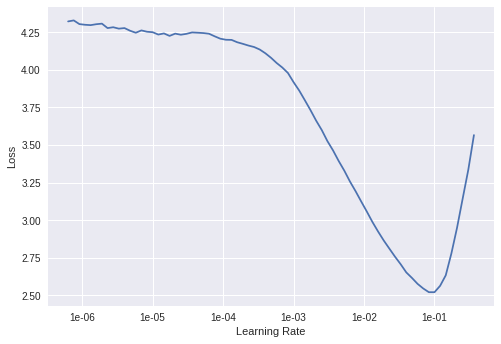

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
1,0.735254,0.285237,0.072395,03:33
2,0.432067,0.217777,0.070365,03:27
3,0.339481,0.227820,0.073072,03:27
4,0.247186,0.176905,0.061570,03:29
5,0.215402,0.176759,0.062246,03:28
6,0.133026,0.156923,0.053451,03:29
7,0.107740,0.141194,0.045332,03:29
8,0.097910,0.146317,0.045332,03:29


In [0]:
learn.save('stage-1-50')

In [40]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.087009,0.143137,0.043978,04:29
2,0.092358,0.138632,0.044655,04:25
3,0.080873,0.131267,0.041949,04:26


In [41]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
miniature_pinscher,staffordshire_bull_terrier,german_shorthaired,chihuahua,scottish_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
shiba_inu,samoyed,pomeranian,staffordshire_bull_terrier,beagle
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [43]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('chihuahua', 'miniature_pinscher', 6),
 ('Bengal', 'Egyptian_Mau', 4),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('yorkshire_terrier', 'scottish_terrier', 2)]

In [44]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

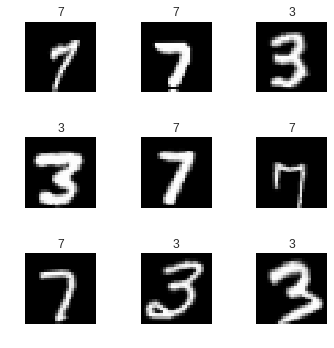

In [46]:
data.show_batch(rows=3, figsize=(5,5))

In [47]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.torch/models/resnet18-5c106cde.pth
46827520it [00:00, 87920026.13it/s]


epoch,train_loss,valid_loss,accuracy,time
1,0.166048,0.084928,0.971541,00:24
2,0.092480,0.044553,0.983808,00:22


In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

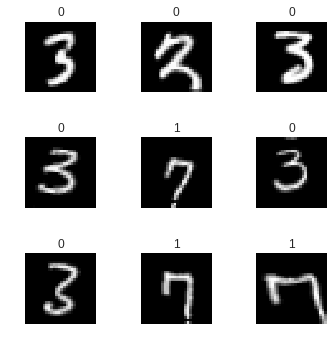

In [50]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

[0, 1]

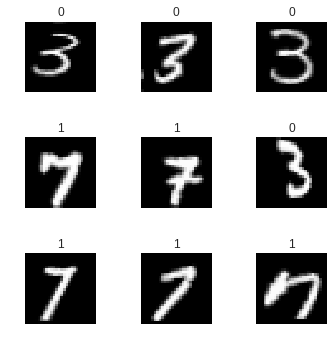

In [51]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [52]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [53]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [54]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

In [55]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [56]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']